In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import configparser
import os
from pathlib import Path

import aps
import aps.ai.autoalignment.beamline28IDB.optimization.analysis_utils as analysis
import aps.ai.autoalignment.beamline28IDB.optimization.common as opt_common
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import scipy
from IPython.display import Image, display_png

%matplotlib inline

28-ID - VKB Pitch Motor Resolution: 2e-05 deg
Qt5Agg: unable to import specified backend (or its dependency); no plots


**** The executable "caRepeater" couldn't be located
**** because of errno = "No such file or directory".
**** You may need to modify your PATH environment variable.
**** Unable to start "CA Repeater" process.
Traceback (most recent call last):
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot.py", line 57, in uti_plot_init
    _backend = uti_plot_matplotlib.Backend(backend, fname_format)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 27, in __init__
    backend = self._init_ipython(backend)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/oasys_srw/uti_plot_matplotlib.py", line 724, in _init_ipython
    get_ipython().magic('matplotlib ' + b)
  File "/Applications/Oasys1.3.app/Contents/Frameworks/Python.framework/Versions/3.8/lib/python3.

In [3]:
exp_type = 'fwhm_lwsi'

In [4]:
#base_dir = Path(aps.__file__).parents[1]
autoalign_dir = Path("/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing")
data_base_dir = autoalign_dir / exp_type / 'raw'
print(f'data base dir exists {data_base_dir.exists()}')


data base dir exists True


In [5]:
log_files = sorted(list(data_base_dir.glob('*.gz')))
hist_dirs = sorted(list(data_base_dir.glob('*steps')))
ini_files = sorted(list(data_base_dir.glob('*ini')))
image_dirs = sorted(list(data_base_dir.glob('*images')))
log_files, hist_dirs, ini_files

([PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/fwhm_lwsi/raw/fwhm_lwsi_moo_optimization_final_150_2022-11-19_14:37.gz'),
  PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/fwhm_lwsi/raw/fwhm_lwsi_optimization_final_150_2022-11-18_23:21.gz')],
 [PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/fwhm_lwsi/raw/fwhm_lwsi_150_2022-11-18_steps'),
  PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/fwhm_lwsi/raw/fwhm_lwsi_moo_150_2022-11-19_steps')],
 [PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/fwhm_lwsi/raw/fwhm_lwsi_autofocusing.ini'),
  PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/fwhm_lwsi/raw/fwhm_lwsi_moo_autofocusing.ini')])

### fwhm_lwsi

In [6]:
!ls $data_base_dir

fwhm_lwsi_150_2022-11-18_images
fwhm_lwsi_150_2022-11-18_steps
fwhm_lwsi_autofocusing.ini
fwhm_lwsi_moo_150_2022-11-19_images
fwhm_lwsi_moo_150_2022-11-19_steps
fwhm_lwsi_moo_autofocusing.ini
fwhm_lwsi_moo_optimization_final_150_2022-11-19_14:37.gz
fwhm_lwsi_optimization_final_150_2022-11-18_23:21.gz


CA client library is unable to contact CA repeater after 50 tries.
Silence this message by starting a CA repeater daemon
or by calling ca_pend_event() and or ca_poll() more often.


In [8]:
study = analysis.create_study_from_trials( data_base_dir / "fwhm_lwsi_optimization_final_150_2022-11-18_23:21.gz")

[I 2022-11-21 00:12:50,274] A new study created in memory with name: no-name-2da9db0d-795f-4eac-bc38-08b5f83d8ae4


Assuming minimization for all objectives.


In [9]:
n_steps = len(study.trials)

In [10]:
hists = analysis.load_histograms_from_files(n_steps, data_base_dir / "fwhm_lwsi_150_2022-11-18_steps", extension='gz')

Trial number 10
Trial values: fwhm 3.960e-02 lwsi 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39004169030828023, 'h_fwhm': 0.034465956461326996, 'h_centroid': -0.00218736875319403, 'h_peak': -0.035441408059286666, 'v_sigma': 0.4571791306797694, 'v_fwhm': 0.019507620164127548, 'v_centroid': 0.0042048864577383105, 'v_peak': 0.020483001172332867, 'integral_intensity': 285.3211315646417, 'peak_intensity': 31237.688, 'gaussian_fit': {}}}


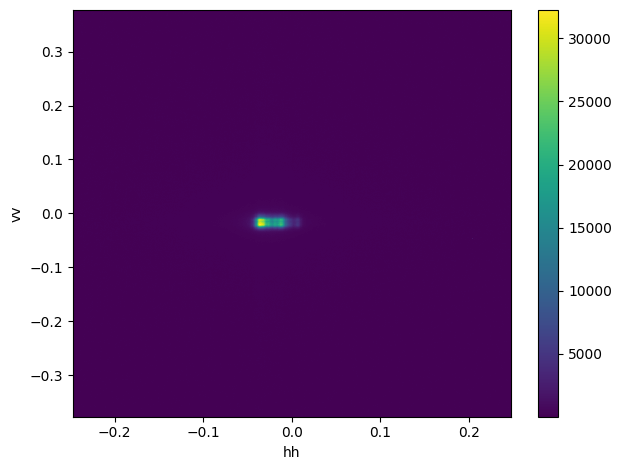

Trial number 85
Trial values: fwhm 1.059e-02 lwsi 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3904434978266455, 'h_fwhm': 0.0078036127836966784, 'h_centroid': -0.0011218357094990306, 'h_peak': -0.025686892079666578, 'v_sigma': 0.45778630290801625, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.003941001156517493, 'v_peak': 0.02698554122704176, 'integral_intensity': 284.70146785922464, 'peak_intensity': 65340.797, 'gaussian_fit': {}}}


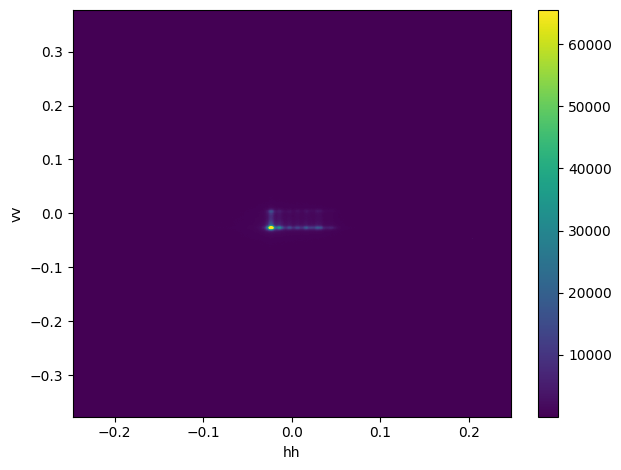

Trial number 145
Trial values: fwhm 5.322e-02 lwsi 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3904090781772309, 'h_fwhm': 0.04357017137563979, 'h_centroid': 0.0009941020395544675, 'h_peak': 0.0022760537285780058, 'v_sigma': 0.4576061998835951, 'v_fwhm': 0.03056193825713316, 'v_centroid': 0.005878752262676867, 'v_peak': 0.000975381008206341, 'integral_intensity': 284.76257632962825, 'peak_intensity': 24216.5, 'gaussian_fit': {}}}


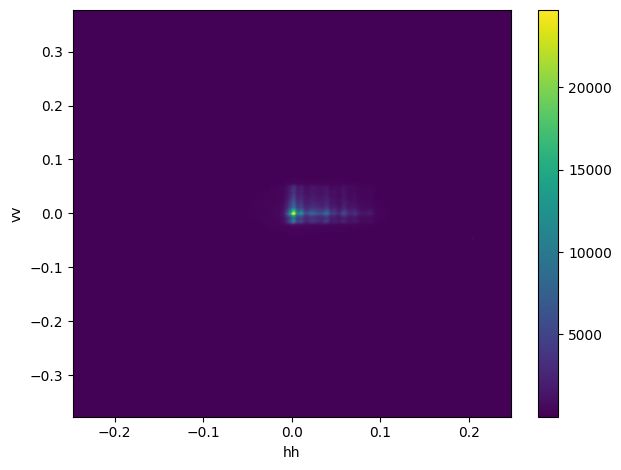

In [11]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: fwhm {t.values[0]:4.3e} lwsi {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.tight_layout()
    plt.colorbar()
    plt.show()

Result: Seems like the beam is too spread out in all the cases.

In [13]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [14]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)

[31, 148, 15]
85 [0.010585784588079523, 19.311638884165312]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3904434978266455, 'h_fwhm': 0.0078036127836966784, 'h_centroid': -0.0011218357094990306, 'h_peak': -0.025686892079666578, 'v_sigma': 0.45778630290801625, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.003941001156517493, 'v_peak': 0.02698554122704176, 'integral_intensity': 284.70146785922464, 'peak_intensity': 65340.797, 'gaussian_fit': {}}}


/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/2426281823.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["fwhm", "lwsi"],


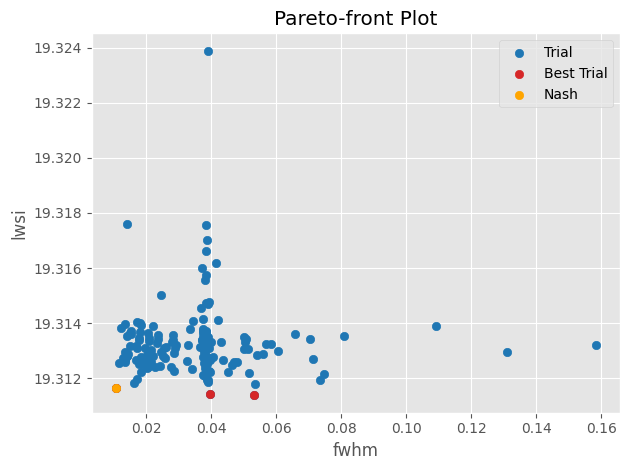

In [18]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["fwhm", "lwsi"], 
                                                  include_dominated_trials=True)
plt.scatter(*nash_trial.values, color='orange', label='Nash')
#plt.ylim(-11.14, -10.9)
#plt.xlim(0, 0.005)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/2135045621.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0],


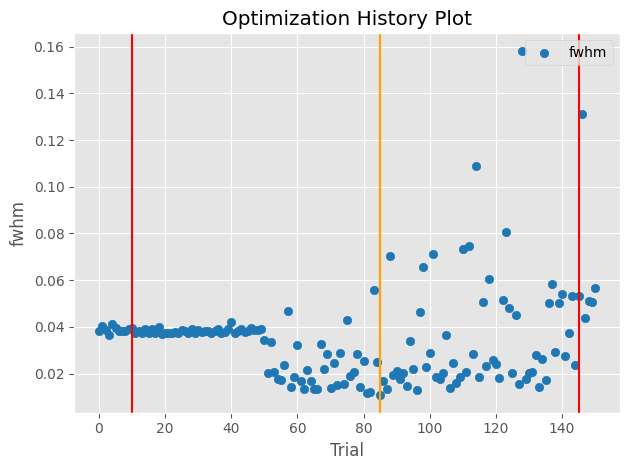

In [24]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], 
                                                          target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/1513963145.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1],


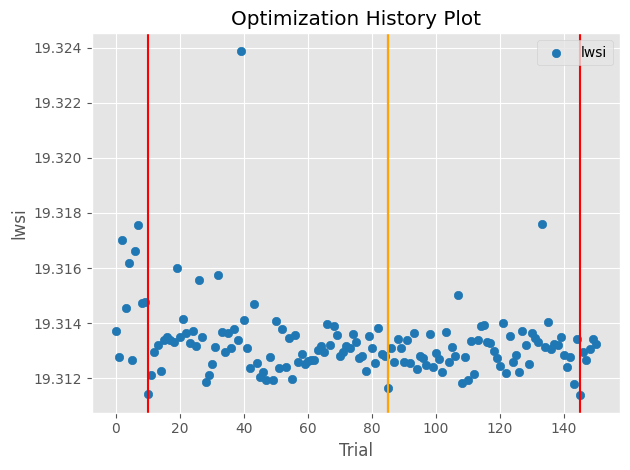

In [25]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], 
                                                          target_name="lwsi")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/2549631295.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: opt_common._get_peak_distance_from_dw(t.user_attrs['dw']),


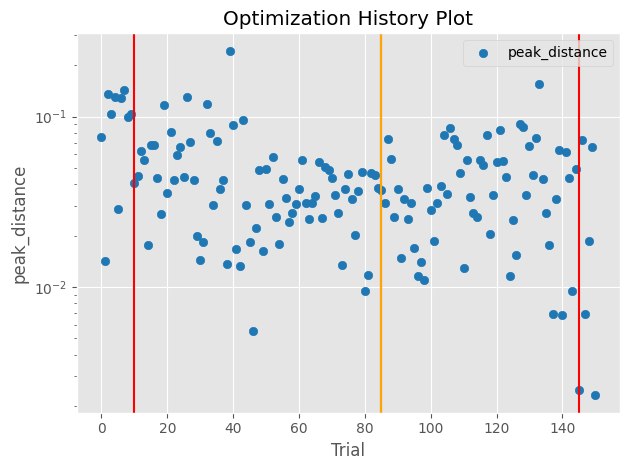

In [26]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: opt_common._get_peak_distance_from_dw(t.user_attrs['dw']), 
                                                          target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.yscale('log')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [27]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0, power=2)
    isum2, wsum2 = analysis.calculate_weighted_sum(h, power=2)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


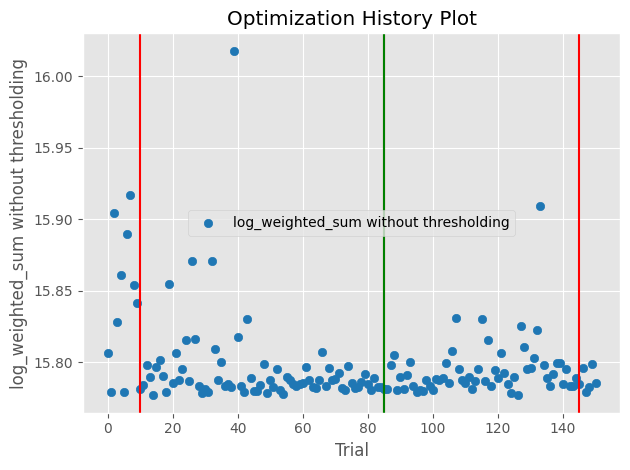

In [28]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


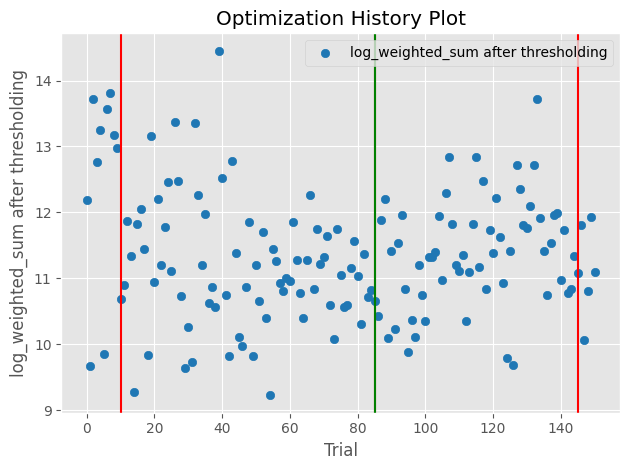

In [29]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [30]:
test_val_fns = [lambda t: t.values[0], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)

54 [0.01768965866542577, 9.220995613567634]


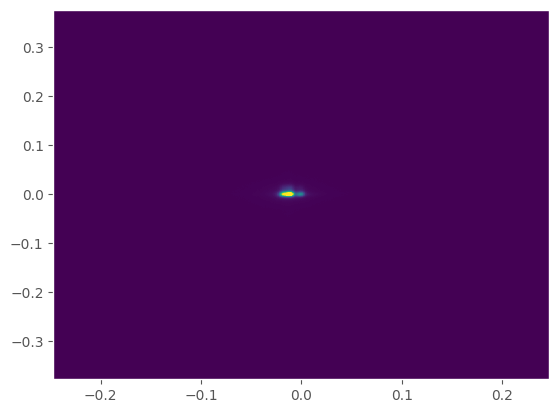

81 [0.011577763245986104, 10.302754945967035]


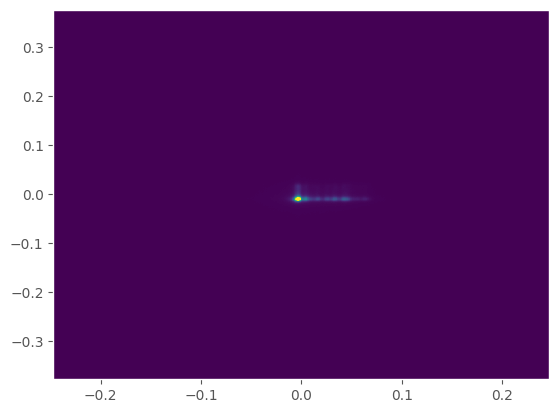

85 [0.010585784588079523, 10.651032567397067]


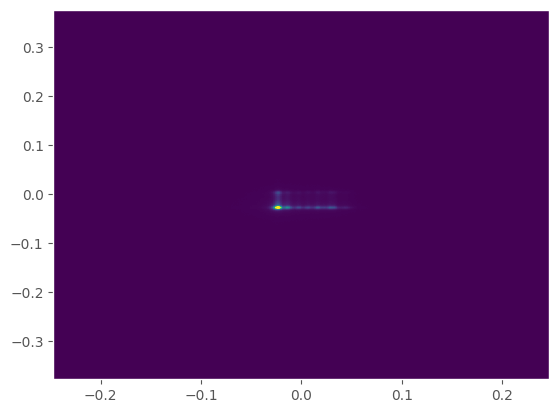

91 [0.01756966389020692, 10.236078101410452]


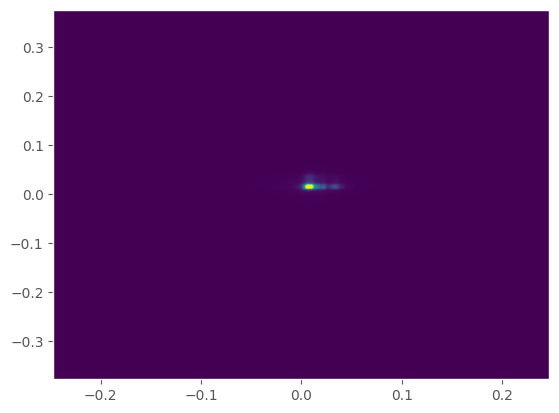

In [31]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [32]:
study.directions

[<StudyDirection.MINIMIZE: 1>, <StudyDirection.MINIMIZE: 1>]

In [33]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

54 [0.01768965866542577, 0.01768965866542577, 9.220995613567634]


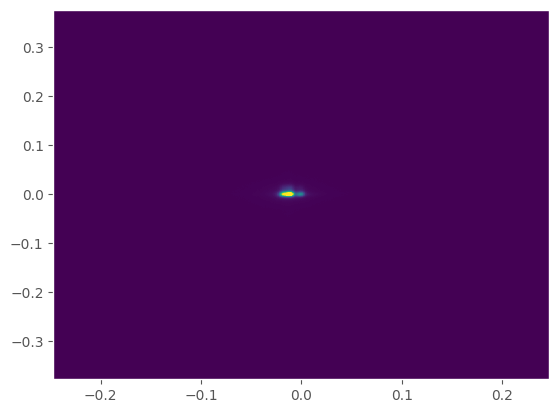

81 [0.011577763245986104, 0.011577763245986104, 10.302754945967035]


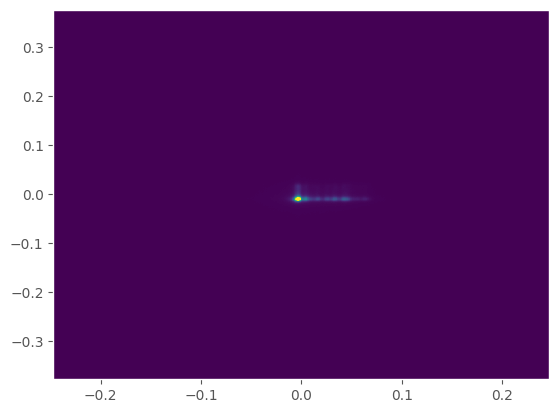

85 [0.010585784588079523, 0.010585784588079523, 10.651032567397067]


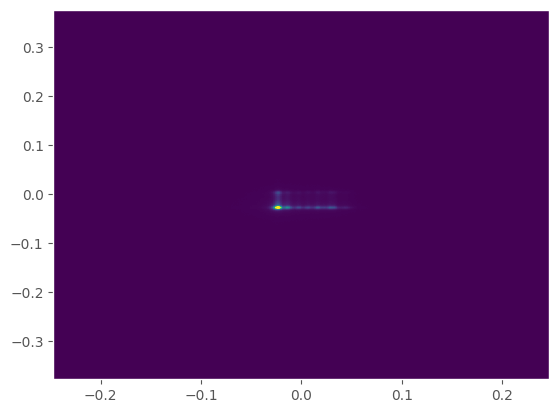

91 [0.01756966389020692, 0.01756966389020692, 10.236078101410452]


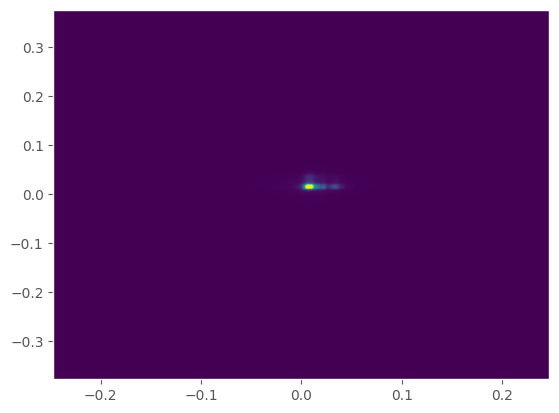

In [34]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [35]:
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1,1], test_val_fns)
np.argmax(domins)
    #ix = np.argmax(n_dominated)
    #return study.best_trials[ix], ix, n_dominated

81

### fwhm_lwsi_moo_2022-11-19

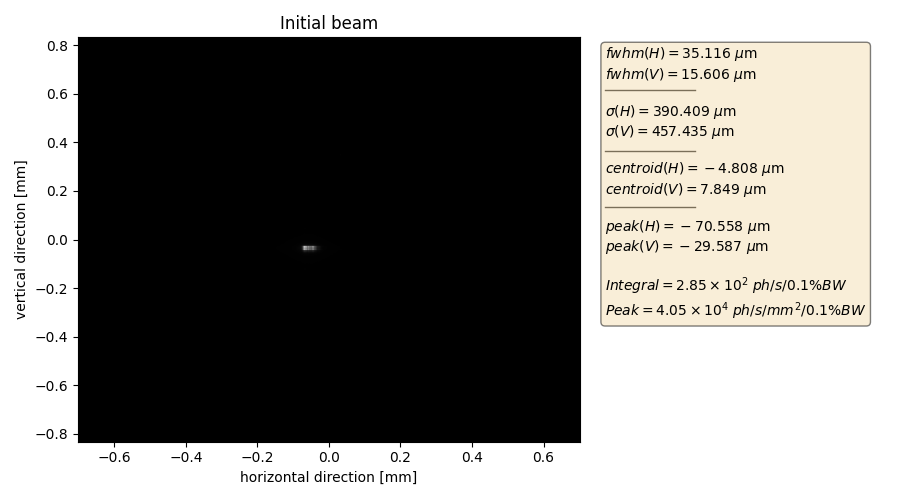

In [6]:
display_png(Image(filename = image_dirs[1] / 'Figure_1.png'))

In [7]:
!ls $data_base_dir

fwhm_lwsi_150_2022-11-18_images
fwhm_lwsi_150_2022-11-18_steps
fwhm_lwsi_autofocusing.ini
fwhm_lwsi_moo_150_2022-11-19_images
fwhm_lwsi_moo_150_2022-11-19_steps
fwhm_lwsi_moo_autofocusing.ini
fwhm_lwsi_moo_optimization_final_150_2022-11-19_14:37.gz
fwhm_lwsi_optimization_final_150_2022-11-18_23:21.gz


In [8]:
study = analysis.create_study_from_trials(data_base_dir / "fwhm_lwsi_moo_optimization_final_150_2022-11-19_14:37.gz")

[I 2022-11-21 02:42:31,688] A new study created in memory with name: no-name-81937cbc-9f37-44ba-9c47-3ac0c1f38a9d


Assuming minimization for all objectives.


In [9]:
n_steps = len(study.trials)

In [10]:
hists = analysis.load_histograms_from_files(n_steps,data_base_dir/ "fwhm_lwsi_moo_150_2022-11-19_steps", 'gz')

In [11]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [12]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)
print("Actual fwhm (not with reference)", opt_common._get_fwhm_from_dw(nash_trial.user_attrs["dw"]))

[97, 109, 10, 134, 118, 97, 78]
128 [0.01209599292592494, 19.312229706577387]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3903716885098599, 'h_fwhm': 0.009754515979620848, 'h_centroid': -0.0012167564637538542, 'h_peak': -0.02503659101435851, 'v_sigma': 0.45755884783698614, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.004821532497745806, 'v_peak': 0.012679953106682285, 'integral_intensity': 285.0715015686262, 'peak_intensity': 65238.89, 'gaussian_fit': {}}}
Actual fwhm (not with reference) 0.01209599292592494


Trial number 85
Trial values: peak_distance 1.930e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39050603581111043, 'h_fwhm': 0.016257526632701413, 'h_centroid': 0.003169374660824925, 'h_peak': 0.033490504863362615, 'v_sigma': 0.45748087296372497, 'v_fwhm': 0.010404064087534692, 'v_centroid': 0.004209281937263165, 'v_peak': 0.020483001172332867, 'integral_intensity': 284.94143633002574, 'peak_intensity': 55876.5, 'gaussian_fit': {}}}
Actual fwhm 0.01930159894284732


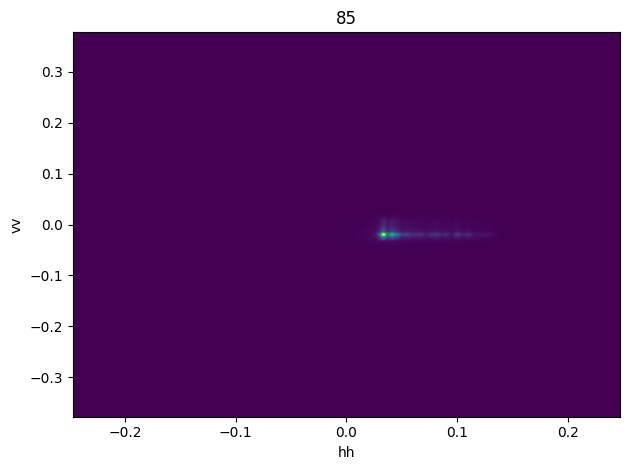

Trial number 90
Trial values: peak_distance 1.517e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39026100356571203, 'h_fwhm': 0.01300602130616113, 'h_centroid': -0.0013480649515152376, 'h_peak': -0.04389532190829092, 'v_sigma': 0.45738879696127066, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.005247591167499843, 'v_peak': 0.004226651035560713, 'integral_intensity': 285.254502222687, 'peak_intensity': 65134.523, 'gaussian_fit': {}}}
Actual fwhm 0.015167206378604381


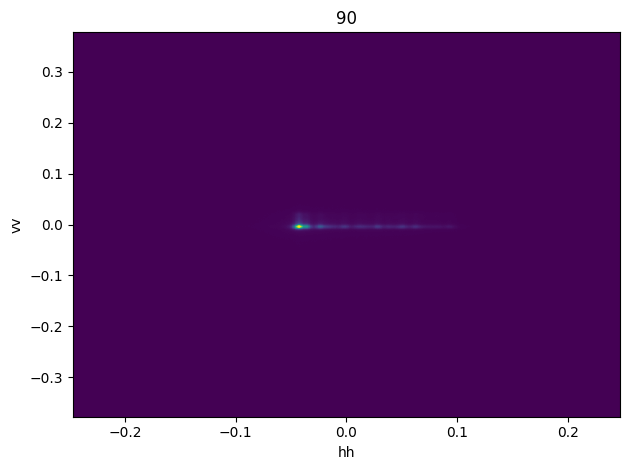

Trial number 121
Trial values: peak_distance 9.754e-03 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3904384741889806, 'h_fwhm': 0.0078036127836966784, 'h_centroid': -0.0012415664023843476, 'h_peak': -0.03023899953682259, 'v_sigma': 0.45777747741340885, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.009394774112314652, 'v_peak': -0.049094177413051956, 'integral_intensity': 285.46020881415643, 'peak_intensity': 65449.562, 'gaussian_fit': {}}}
Actual fwhm 0.009754261862385233


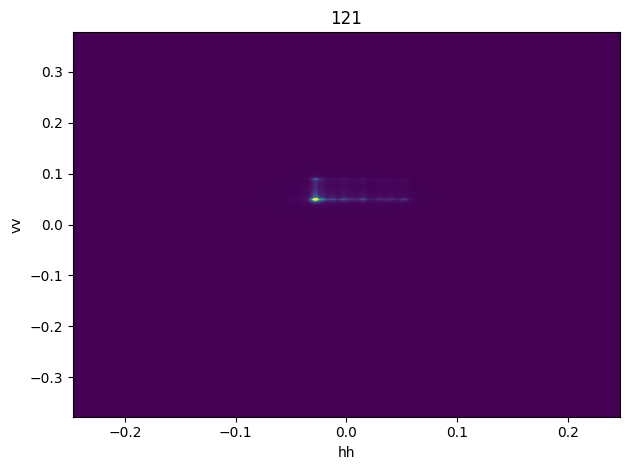

Trial number 128
Trial values: peak_distance 1.210e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3903716885098599, 'h_fwhm': 0.009754515979620848, 'h_centroid': -0.0012167564637538542, 'h_peak': -0.02503659101435851, 'v_sigma': 0.45755884783698614, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.004821532497745806, 'v_peak': 0.012679953106682285, 'integral_intensity': 285.0715015686262, 'peak_intensity': 65238.89, 'gaussian_fit': {}}}
Actual fwhm 0.01209599292592494


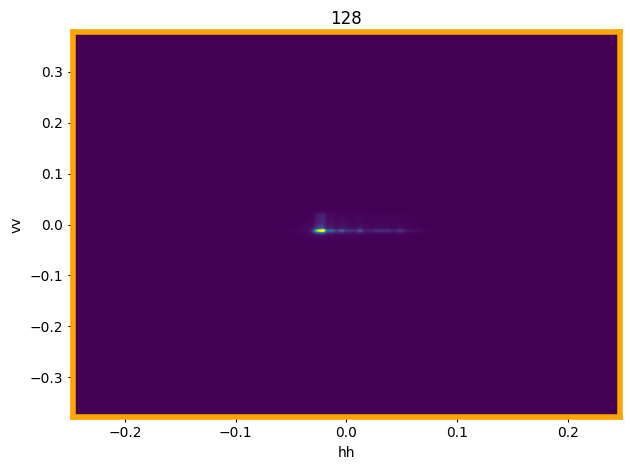

Trial number 140
Trial values: peak_distance 1.107e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39031894936550804, 'h_fwhm': 0.008453913849004735, 'h_centroid': -0.0029746045035284885, 'h_peak': -0.05234923575729503, 'v_sigma': 0.4574111408672301, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.005038186760355751, 'v_peak': 0.012679953106682285, 'integral_intensity': 285.28348679833016, 'peak_intensity': 65372.63, 'gaussian_fit': {}}}
Actual fwhm 0.011073893725051806


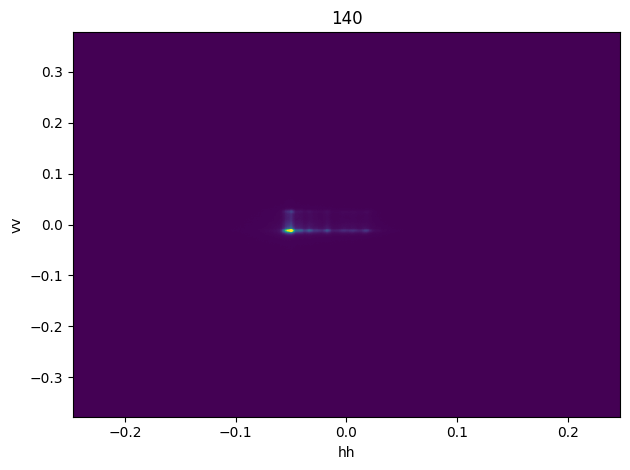

Trial number 146
Trial values: peak_distance 1.930e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39009465259313036, 'h_fwhm': 0.010404817044928905, 'h_centroid': -0.0005689904729921647, 'h_peak': -0.010729967577582262, 'v_sigma': 0.4573931218887103, 'v_fwhm': 0.016256350136772957, 'v_centroid': 0.002995206108749815, 'v_peak': 0.03478858929269234, 'integral_intensity': 285.2896842472772, 'peak_intensity': 56168.75, 'gaussian_fit': {}}}
Actual fwhm 0.019301013898440703


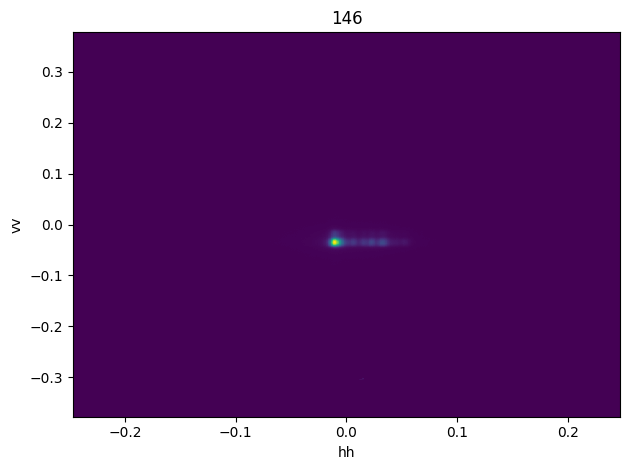

Trial number 148
Trial values: peak_distance 2.596e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3900836612394969, 'h_fwhm': 0.024061139416398092, 'h_centroid': -0.0006433428234695893, 'h_peak': -0.012030569708198243, 'v_sigma': 0.45735405400174617, 'v_fwhm': 0.009753810082063774, 'v_centroid': 0.004212751904567935, 'v_peak': 0.019832747166862022, 'integral_intensity': 285.25834518229607, 'peak_intensity': 53100.23, 'gaussian_fit': {}}}
Actual fwhm 0.0259629590211192


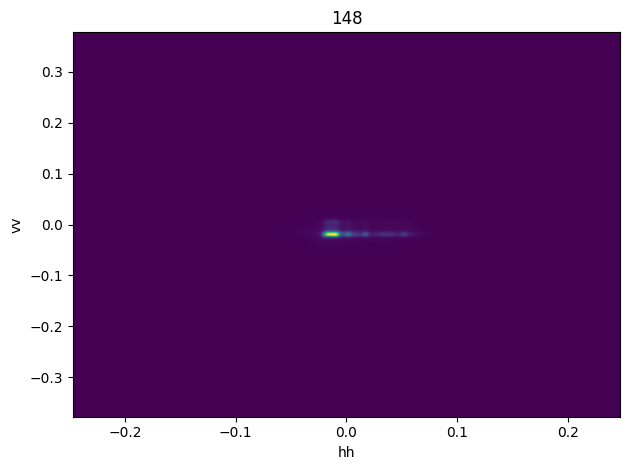

In [13]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    print("Actual fwhm", opt_common._get_fwhm_from_dw(t.user_attrs["dw"]))
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    if t.number == nash_trial.number:
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(4)
            plt.gca().spines[axis].set_color('orange')
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.title(t.number)
    plt.tight_layout()
    plt.show()

In [15]:
pareto_df = analysis.get_pareto_dataframe_from_study(study, ['fwhm', 'lwsi'])

In [16]:
pareto_df

,number,fwhm,lwsi,h_peak,v_peak,h_fwhm,v_fwhm,peak_intensity
85,85,0.019302,19.311874,0.033491,0.020483,0.016258,0.010404,55876.500000
90,90,0.015167,19.312215,-0.043895,0.004227,0.013006,0.007803,65134.523438
121,121,0.009754,19.314469,-0.030239,-0.049094,0.007804,0.005852,65449.562500
128,128,0.012096,19.312230,-0.025037,0.012680,0.009755,0.007153,65238.890625
140,140,0.011074,19.312511,-0.052349,0.012680,0.008454,0.007153,65372.628906
146,146,0.019301,19.311933,-0.010730,0.034789,0.010405,0.016256,56168.750000
148,148,0.025963,19.311727,-0.012031,0.019833,0.024061,0.009754,53100.230469


CA client library is unable to contact CA repeater after 50 tries.
Silence this message by starting a CA repeater daemon
or by calling ca_pend_event() and or ca_poll() more often.
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
CAC: error = "Network is unreachable" sending UDP msg to 192.168.0.255:5064
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon was "Network is unreachable"
error sending registration message to CA repeater daemon

Trial number 85
Trial values: peak_distance 1.930e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39050603581111043, 'h_fwhm': 0.016257526632701413, 'h_centroid': 0.003169374660824925, 'h_peak': 0.033490504863362615, 'v_sigma': 0.45748087296372497, 'v_fwhm': 0.010404064087534692, 'v_centroid': 0.004209281937263165, 'v_peak': 0.020483001172332867, 'integral_intensity': 284.94143633002574, 'peak_intensity': 55876.5, 'gaussian_fit': {}}}
Actual fwhm 0.01209599292592494


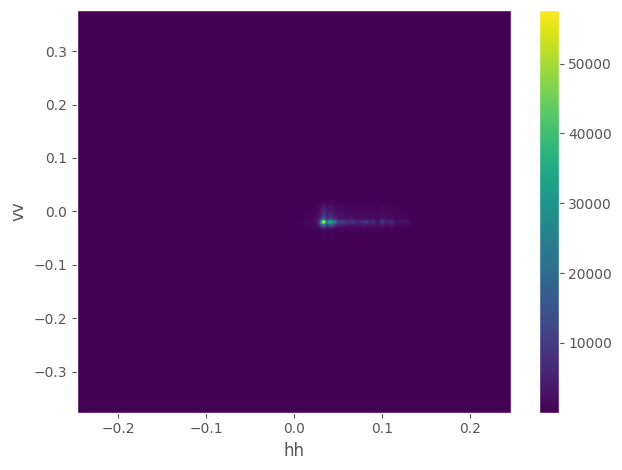

Trial number 90
Trial values: peak_distance 1.517e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39026100356571203, 'h_fwhm': 0.01300602130616113, 'h_centroid': -0.0013480649515152376, 'h_peak': -0.04389532190829092, 'v_sigma': 0.45738879696127066, 'v_fwhm': 0.007803048065651019, 'v_centroid': 0.005247591167499843, 'v_peak': 0.004226651035560713, 'integral_intensity': 285.254502222687, 'peak_intensity': 65134.523, 'gaussian_fit': {}}}
Actual fwhm 0.01209599292592494


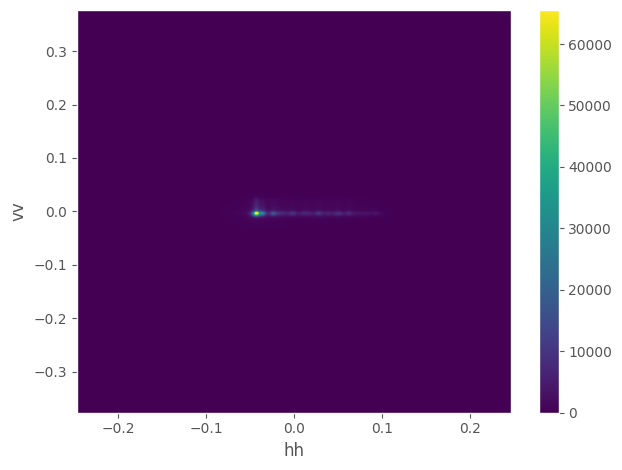

Trial number 121
Trial values: peak_distance 9.754e-03 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3904384741889806, 'h_fwhm': 0.0078036127836966784, 'h_centroid': -0.0012415664023843476, 'h_peak': -0.03023899953682259, 'v_sigma': 0.45777747741340885, 'v_fwhm': 0.0058522860492382645, 'v_centroid': 0.009394774112314652, 'v_peak': -0.049094177413051956, 'integral_intensity': 285.46020881415643, 'peak_intensity': 65449.562, 'gaussian_fit': {}}}
Actual fwhm 0.01209599292592494


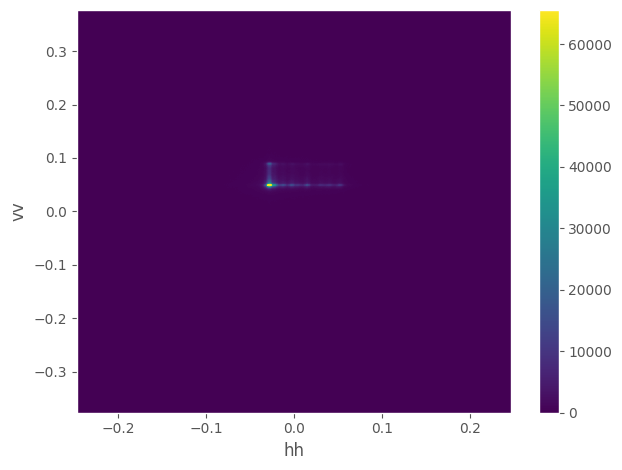

Trial number 128
Trial values: peak_distance 1.210e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3903716885098599, 'h_fwhm': 0.009754515979620848, 'h_centroid': -0.0012167564637538542, 'h_peak': -0.02503659101435851, 'v_sigma': 0.45755884783698614, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.004821532497745806, 'v_peak': 0.012679953106682285, 'integral_intensity': 285.0715015686262, 'peak_intensity': 65238.89, 'gaussian_fit': {}}}
Actual fwhm 0.01209599292592494


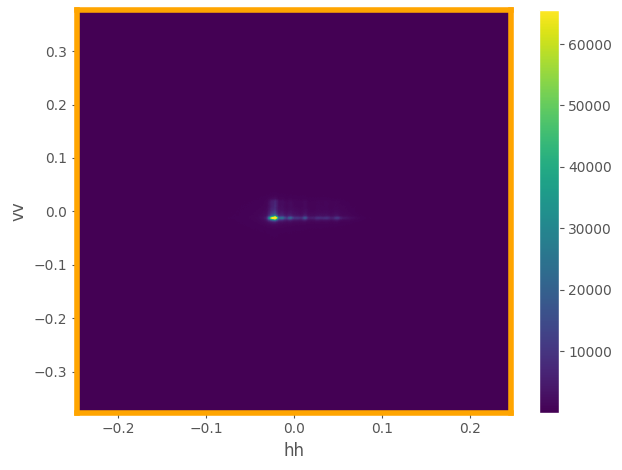

Trial number 140
Trial values: peak_distance 1.107e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39031894936550804, 'h_fwhm': 0.008453913849004735, 'h_centroid': -0.0029746045035284885, 'h_peak': -0.05234923575729503, 'v_sigma': 0.4574111408672301, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.005038186760355751, 'v_peak': 0.012679953106682285, 'integral_intensity': 285.28348679833016, 'peak_intensity': 65372.63, 'gaussian_fit': {}}}
Actual fwhm 0.01209599292592494


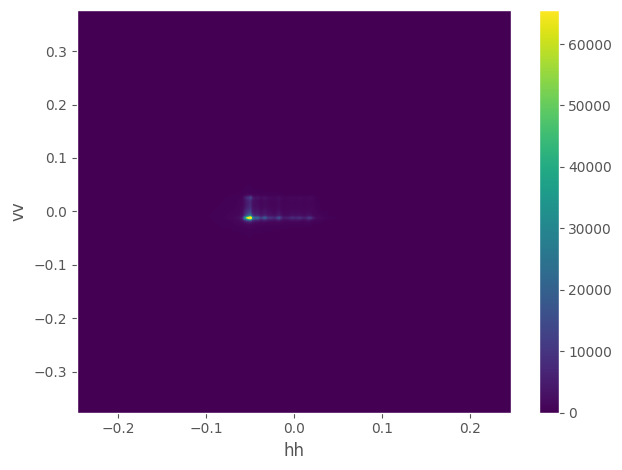

Trial number 146
Trial values: peak_distance 1.930e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.39009465259313036, 'h_fwhm': 0.010404817044928905, 'h_centroid': -0.0005689904729921647, 'h_peak': -0.010729967577582262, 'v_sigma': 0.4573931218887103, 'v_fwhm': 0.016256350136772957, 'v_centroid': 0.002995206108749815, 'v_peak': 0.03478858929269234, 'integral_intensity': 285.2896842472772, 'peak_intensity': 56168.75, 'gaussian_fit': {}}}
Actual fwhm 0.01209599292592494


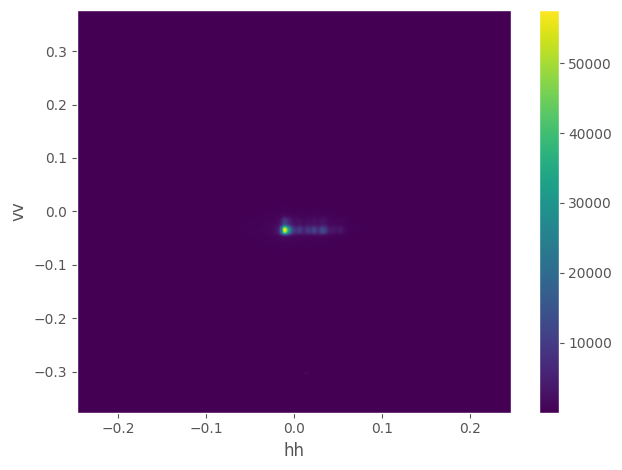

Trial number 148
Trial values: peak_distance 2.596e-02 fwhm 1.931e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3900836612394969, 'h_fwhm': 0.024061139416398092, 'h_centroid': -0.0006433428234695893, 'h_peak': -0.012030569708198243, 'v_sigma': 0.45735405400174617, 'v_fwhm': 0.009753810082063774, 'v_centroid': 0.004212751904567935, 'v_peak': 0.019832747166862022, 'integral_intensity': 285.25834518229607, 'peak_intensity': 53100.23, 'gaussian_fit': {}}}
Actual fwhm 0.01209599292592494


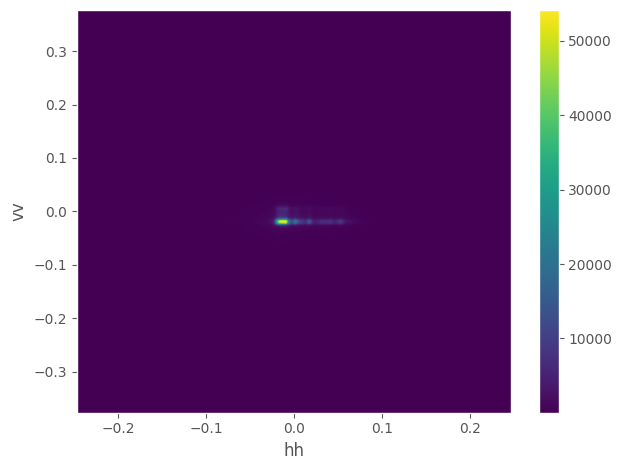

In [53]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    print("Actual fwhm", opt_common._get_fwhm_from_dw(nash_trial.user_attrs["dw"]))
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    if t.number == nash_trial.number:
        for axis in ['top','bottom','left','right']:
            plt.gca().spines[axis].set_linewidth(4)
            plt.gca().spines[axis].set_color('orange')
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.tight_layout()
    plt.colorbar()
    plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/3075497487.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["fwhm", "lwsi"],


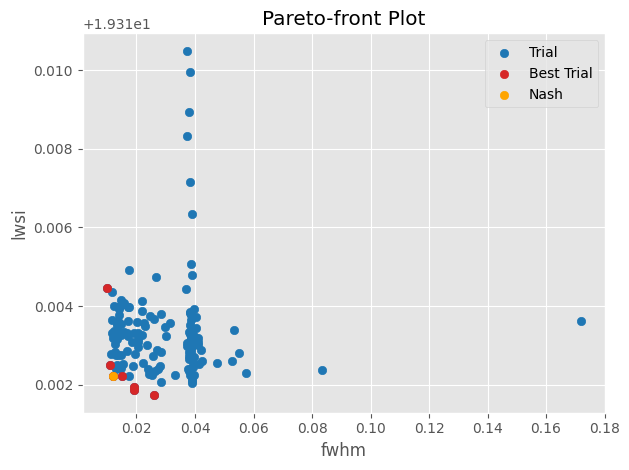

In [55]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["fwhm", "lwsi"], 
                                                  include_dominated_trials=True)
plt.scatter(*nash_trial.values, color='orange', label='Nash')
#plt.ylim(-11.10, -11)
#plt.xlim(0, 0.01)
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/3735537514.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="fwhm")


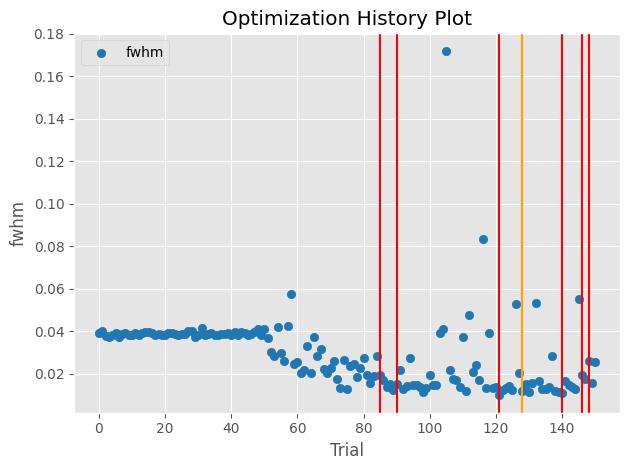

In [56]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/4145310622.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="lwsi")


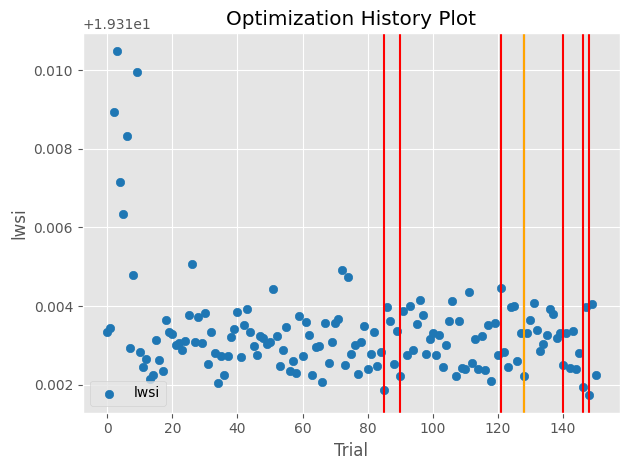

In [58]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="lwsi")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/3818570731.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study,


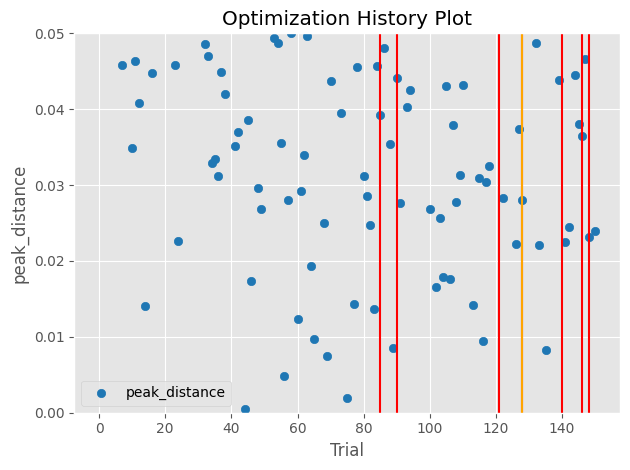

In [62]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, 
                                                          target=lambda t: opt_common._get_peak_distance_from_dw(t.user_attrs["dw"]), 
                                                          target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.ylim(0, 0.05)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/4190150875.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study,


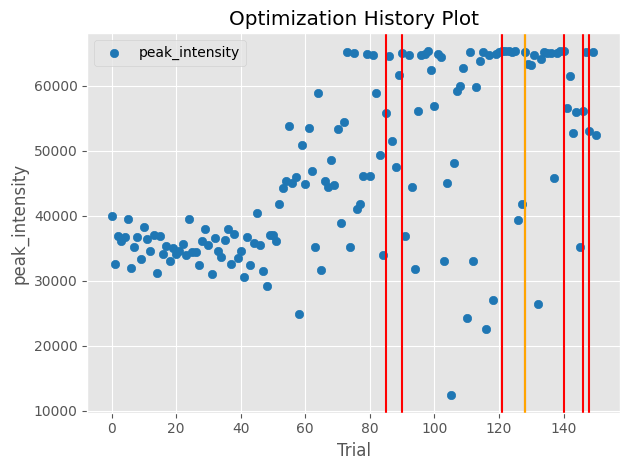

In [70]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, 
                                                          target=lambda t: opt_common._get_peak_intensity_from_dw(t.user_attrs["dw"]), 
                                                          target_name="peak_intensity")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='orange')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [63]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    isum1, wsum1 = analysis.calculate_weighted_sum(h, threshold=0)
    isum2, wsum2 = analysis.calculate_weighted_sum(h)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


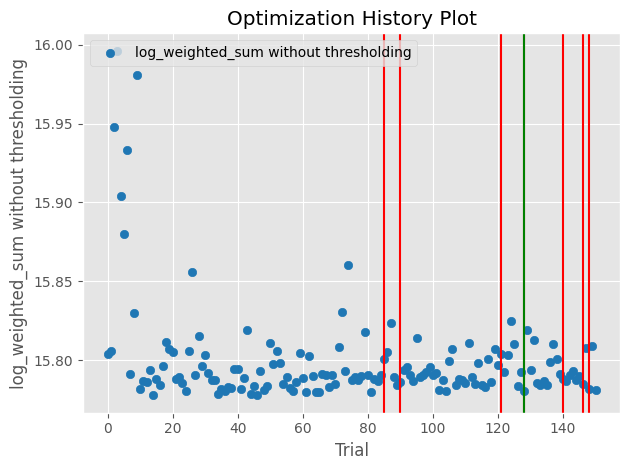

In [64]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_88738/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


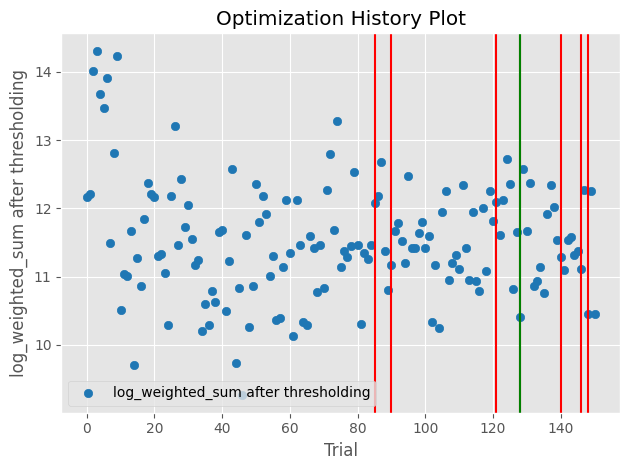

In [65]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [66]:
test_val_fns = [lambda t: t.values[0], lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins))
    #ix = np.argmax(n_dominated)
    #return study.best_trials[ix], ix, n_dominated

128


46 [0.038680039074606265, 9.258184840460178]


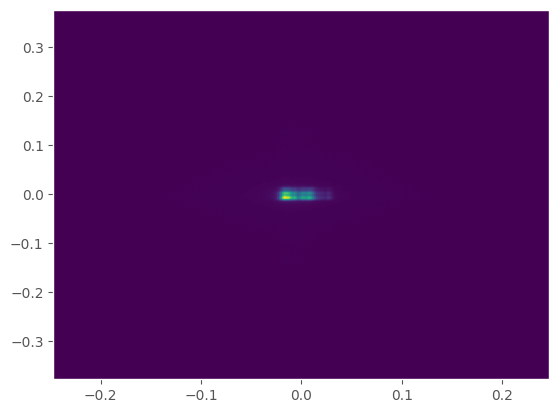

61 [0.020315187094283864, 10.135377121385128]


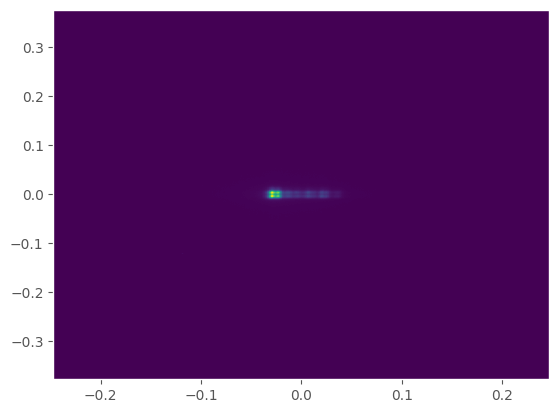

81 [0.019562959379688178, 10.305171098271831]


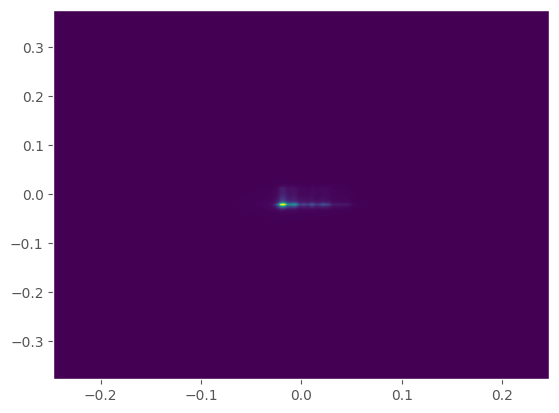

102 [0.014612942911564921, 10.32917673293398]


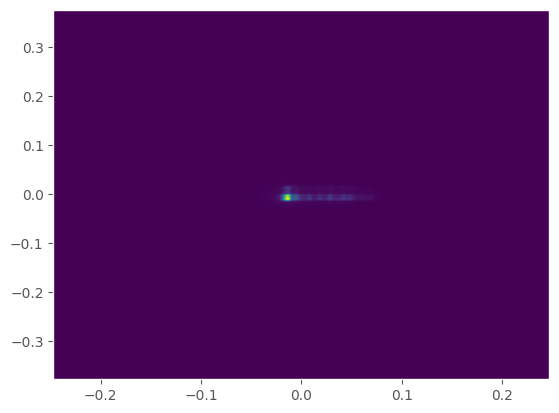

121 [0.009754261862385233, 12.090343186221439]


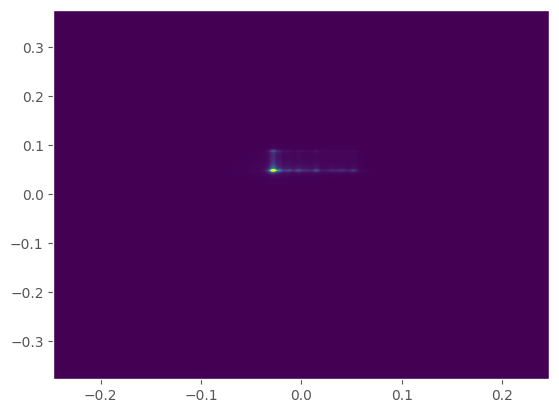

128 [0.01209599292592494, 10.414897964640408]


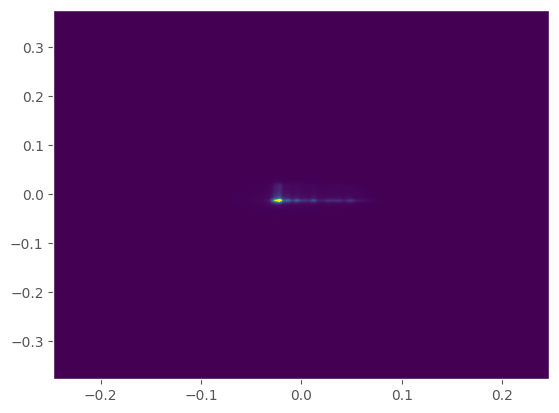

140 [0.011073893725051806, 11.288196893424269]


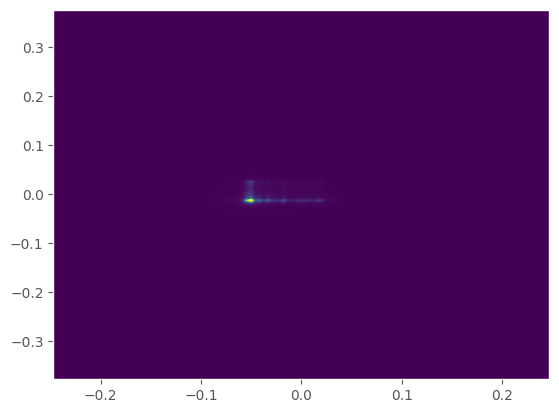

In [67]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [115]:
test_val_fns = [lambda t: t.values[0], 
                lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), 
                lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1,1], test_val_fns)
np.argmax(domins)
    #ix = np.argmax(n_dominated)
    #return study.best_trials[ix], ix, n_dominated

109

31 [0.01112135792891793, 0.03992796070213771, 9.191376983041161]


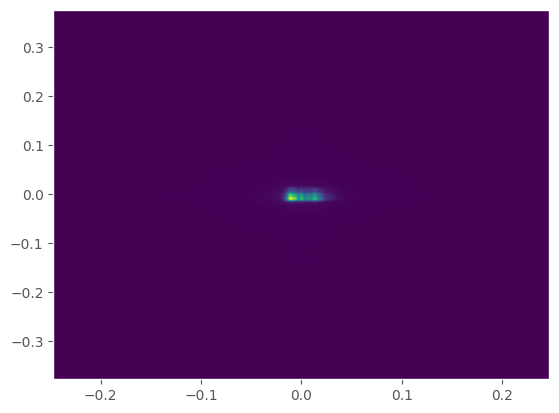

44 [0.045100607751148415, 0.03724310387604322, 9.216946676658285]


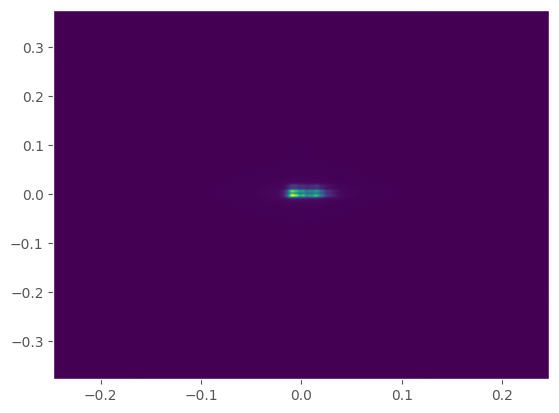

46 [0.004973500638303536, 0.038389261759203264, 9.514013727543725]


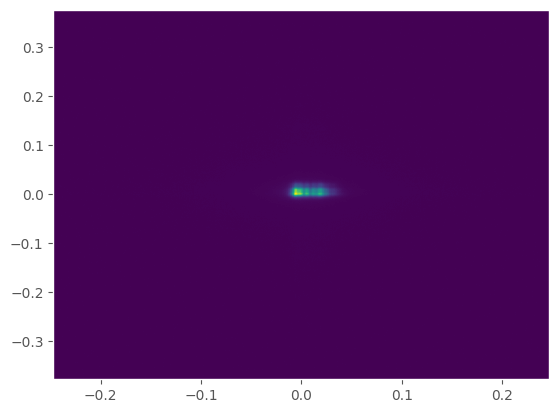

69 [0.00045981565522807544, 0.012508592584035905, 10.681866931711529]


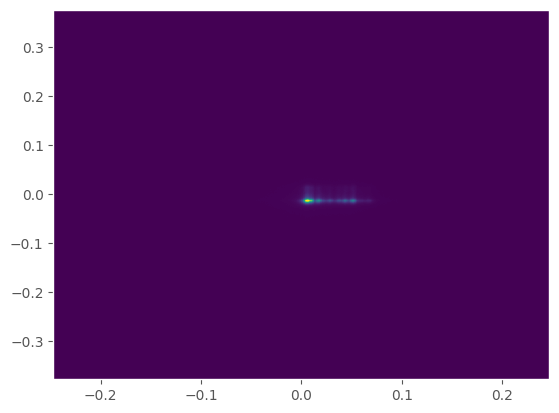

105 [0.0045287806349269205, 0.010822937734649695, 10.417242774974666]


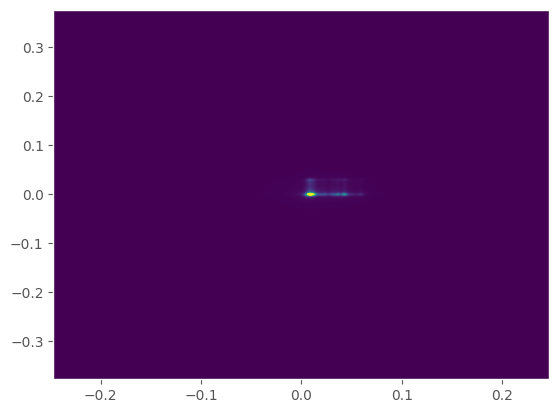

108 [0.0037071193096392795, 0.015875101192067555, 9.52805438977631]


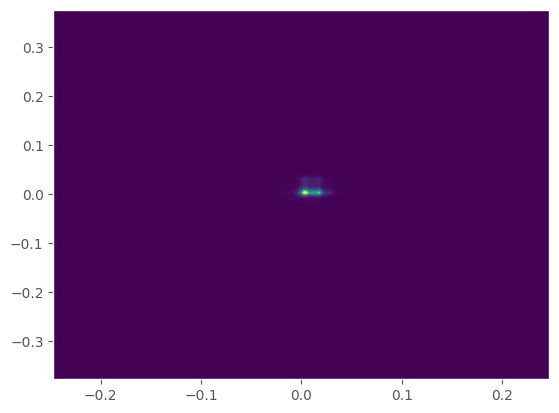

109 [0.00045981565522817996, 0.013916415050857934, 9.829718664366686]


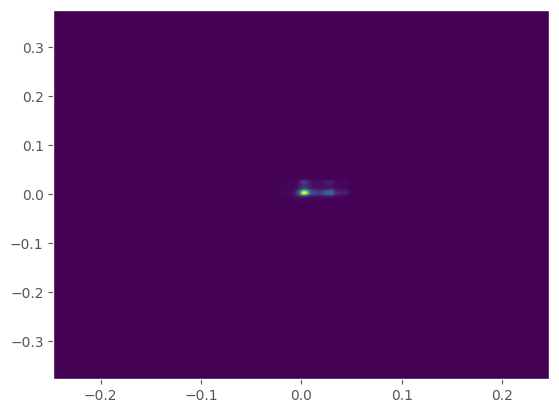

122 [0.0024762448761266446, 0.012809292543290565, 10.359408663506075]


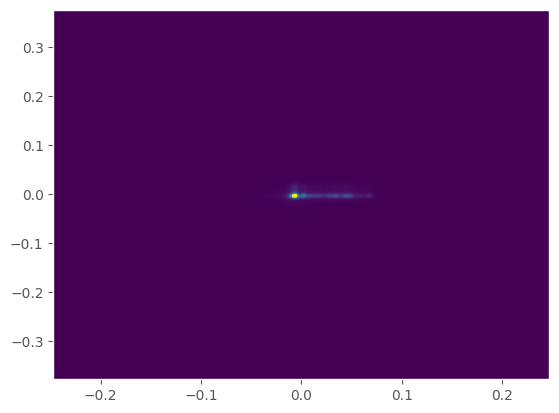

123 [0.008784831945102966, 0.011937733023507934, 9.611635181681885]


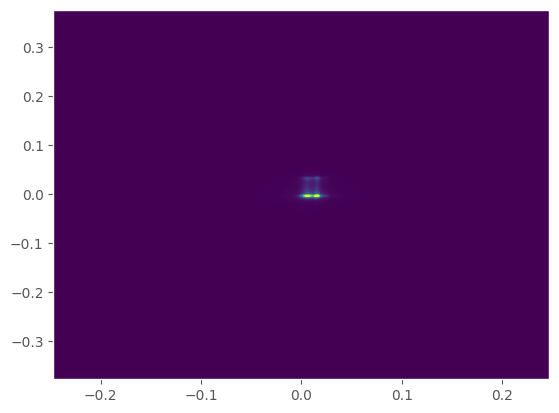

126 [0.01931841032323324, 0.017497245446776832, 9.512321449608265]


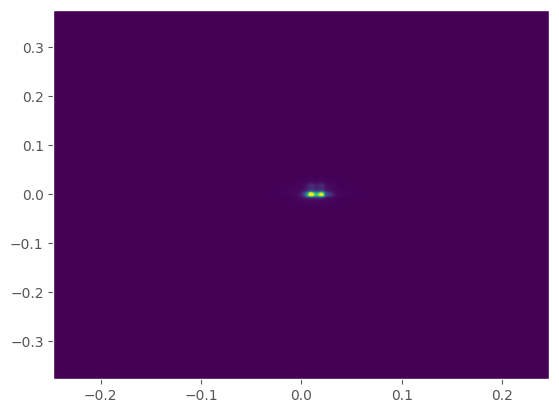

129 [0.012883483783582958, 0.03724345884059089, 9.385133217827901]


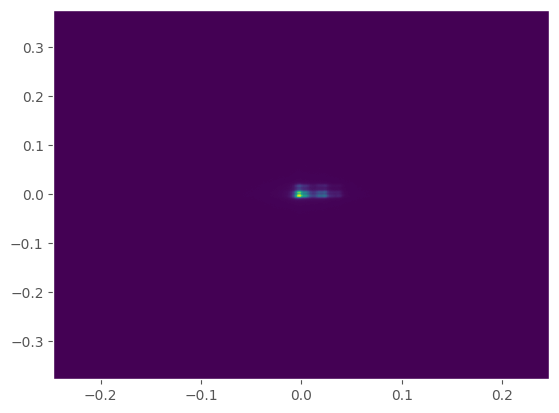

148 [0.024646710365230577, 0.010585784588079523, 11.573861721894692]


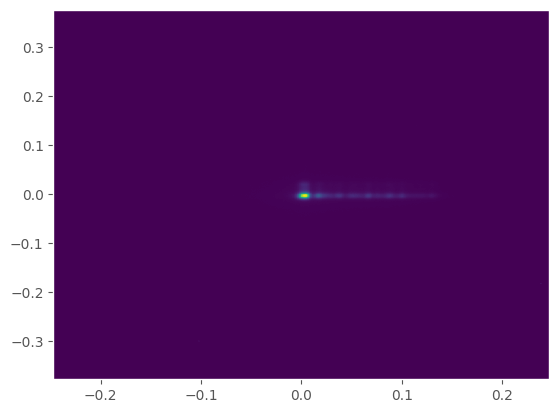

150 [0.0024762448761266446, 0.01103557572547687, 11.349052131067902]


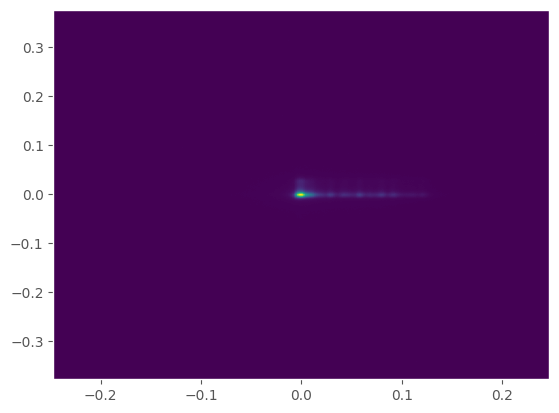

In [117]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [118]:
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1,1], test_val_fns)
np.argmax(domins)
    #ix = np.argmax(n_dominated)
    #return study.best_trials[ix], ix, n_dominated

109